In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [52]:
data = pd.read_excel('DDS9_Data_Extract_with_labels.xlsx')

Data Pre-Processing

In [53]:
target = 'Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the quest'

features = [
    'Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone (three to five inches)',
    'Q8 - Which of the following media or home entertainment equipment does your household own?-Large smartphone (between five and seven inches)',
    'Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone)']

wtp_mapping = {
    'Agree strongly': 1,
    'Disagree strongly': 0,
}

data = data.drop(data[data[target] == 'N/A; I do not have a basis to answer'].index)
data = data.drop(data[data[target] == 'Agree somewhat'].index)
data = data.drop(data[data[target] == 'Disagree somewhat'].index)

data[target] = data[target].map(wtp_mapping)

model_data = data[features + [target]]

label_encoder = LabelEncoder()
for column in model_data.select_dtypes(include=['object']).columns:
    model_data[column] = label_encoder.fit_transform(model_data[column])

model_data

C:\Users\vatsa\AppData\Local\Temp\ipykernel_19636\516260789.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data[column] = label_encoder.fit_transform(model_data[column])
C:\Users\vatsa\AppData\Local\Temp\ipykernel_19636\516260789.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data[column] = label_encoder.fit_transform(model_data[column])
C:\Users\vatsa\AppData\Local\Temp\ipykernel_19636\516260789.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone (three to five inches),Q8 - Which of the following media or home entertainment equipment does your household own?-Large smartphone (between five and seven inches),Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone),"Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the quest"
2,1,0,1,1
7,1,0,0,0
8,0,0,1,0
10,1,0,0,0
13,1,1,0,1
...,...,...,...,...
2053,0,0,1,0
2059,0,0,1,0
2062,0,0,1,0
2072,1,1,1,1


Train Model

In [54]:
X = model_data[features]
y = label_encoder.fit_transform(model_data[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6496350364963503
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.32      0.43        57
           1       0.65      0.89      0.75        80

    accuracy                           0.65       137
   macro avg       0.66      0.60      0.59       137
weighted avg       0.65      0.65      0.61       137



Data Visualization

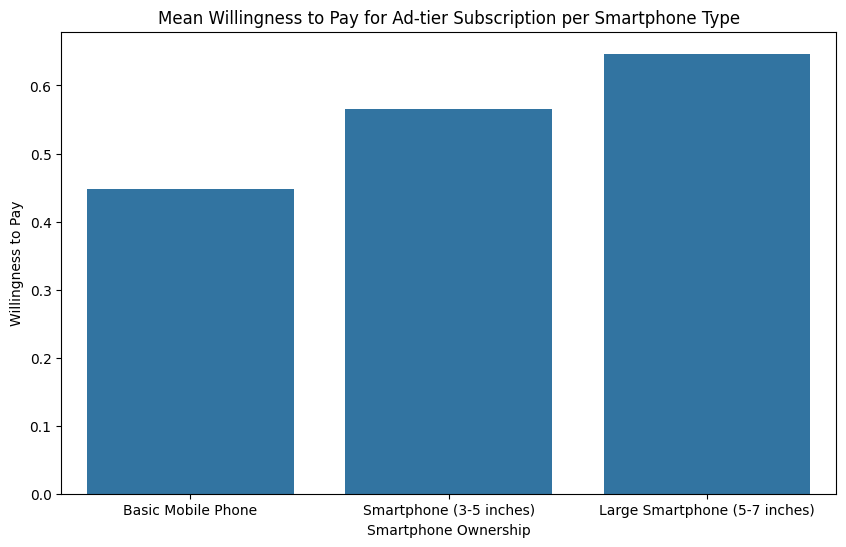

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

smartphone_basic = 'Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone)'
smartphone_3to5 = 'Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone (three to five inches)'
smartphone_5to7 = 'Q8 - Which of the following media or home entertainment equipment does your household own?-Large smartphone (between five and seven inches)'
ads_column = 'Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the quest'

smartphone_basic_yes_mean = data[data[smartphone_basic] == 'Yes'][ads_column].mean()
smartphone_3to5_yes_mean = data[data[smartphone_3to5] == 'Yes'][ads_column].mean()
smartphone_5to7_yes_mean = data[data[smartphone_5to7] == 'Yes'][ads_column].mean()

smartphone_basic_yes_mean, smartphone_3to5_yes_mean, smartphone_5to7_yes_mean

means = [smartphone_basic_yes_mean, smartphone_3to5_yes_mean, smartphone_5to7_yes_mean]
labels = ['Basic Mobile Phone', 'Smartphone (3-5 inches)', 'Large Smartphone (5-7 inches)']

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=means)
plt.title('Mean Willingness to Pay for Ad-tier Subscription per Smartphone Type')
plt.xlabel('Smartphone Ownership')
plt.ylabel('Willingness to Pay')
plt.show()
